Jumlah total data: 781 baris

MSE: 0.465
R² : 0.626


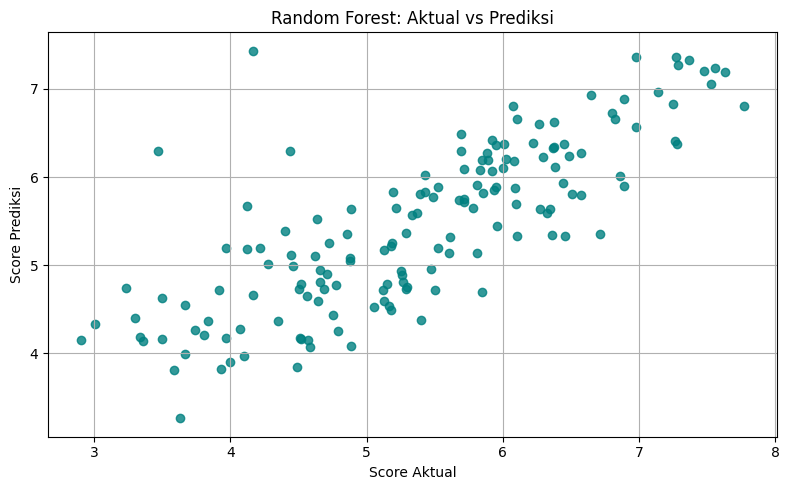

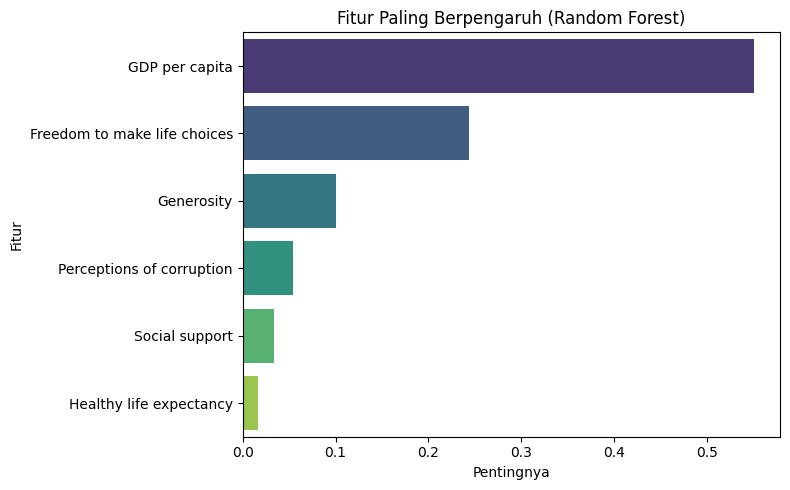

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

years = [2015, 2016, 2017, 2018, 2019]
all_data = []

for year in years:
    file_path = f"{year}.csv"  
    df = pd.read_csv(file_path)

    rename_map = {
        'Country name': 'Country',
        'Country Name': 'Country',
        'Country or region': 'Country',
        'Happiness Score': 'Score',
        'Happiness.Score': 'Score',
        'Economy (GDP per Capita)': 'GDP per capita',
        'Logged GDP per capita': 'GDP per capita',
        'Healthy life expectancy': 'Healthy life expectancy',
        'Social support': 'Social support',
        'Freedom': 'Freedom to make life choices',
        'Freedom to make life choices': 'Freedom to make life choices',
        'Perceptions of corruption': 'Perceptions of corruption',
        'Trust (Government Corruption)': 'Perceptions of corruption',
        'Trust': 'Perceptions of corruption'
    }



    df.rename(columns=rename_map, inplace=True)  
    df['Year'] = year  


    selected_cols = [
    'Country',
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Score'
]

    df = df[[col for col in selected_cols if col in df.columns] + ['Year']]
    df.dropna(inplace=True)  

    all_data.append(df)


df_all = pd.concat(all_data, ignore_index=True)
print(f"Jumlah total data: {df_all.shape[0]} baris")

X = df_all.drop(columns=["Score", "Year", "Country"])
y = df_all["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMSE: {mse:.3f}")
print(f"R² : {r2:.3f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.8, color='teal')
plt.xlabel("Score Aktual")
plt.ylabel("Score Prediksi")
plt.title("Random Forest: Aktual vs Prediksi")
plt.grid(True)
plt.tight_layout()
plt.show()

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    "Fitur": features,
    "Pentingnya": importances
}).sort_values(by="Pentingnya", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Pentingnya", y="Fitur", data=importance_df, hue="Fitur", dodge=False, legend=False, palette="viridis")

plt.title("Fitur Paling Berpengaruh (Random Forest)")
plt.tight_layout()
plt.show()


Scor kebahagaiaan per tahun

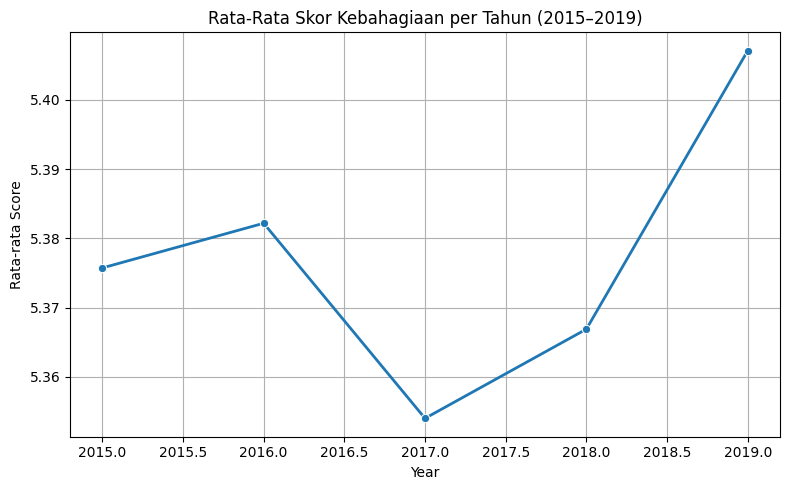

In [ ]:
avg_score_year = df_all.groupby("Year")["Score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x="Year", y="Score", data=avg_score_year, marker="o", linewidth=2)
plt.title("Rata-Rata Skor Kebahagiaan per Tahun (2015–2019)")
plt.ylabel("Rata-rata Score")
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Negara Paling Bahagia Dari Dataset

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_11884\1118647419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


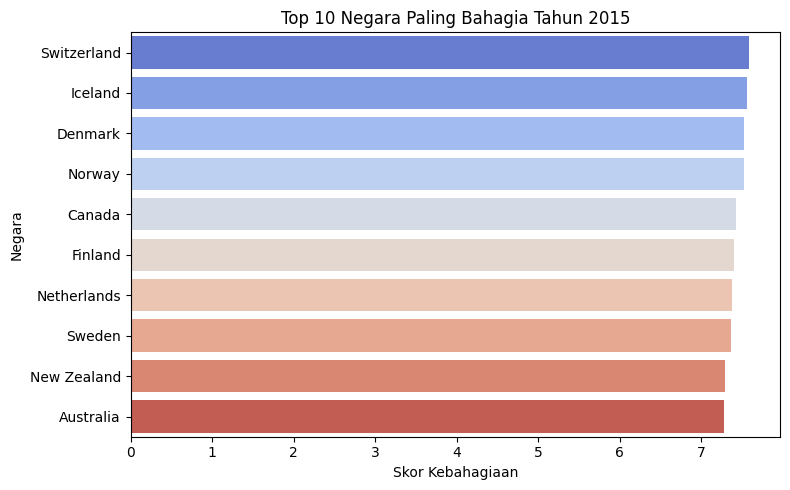

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_11884\1118647419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


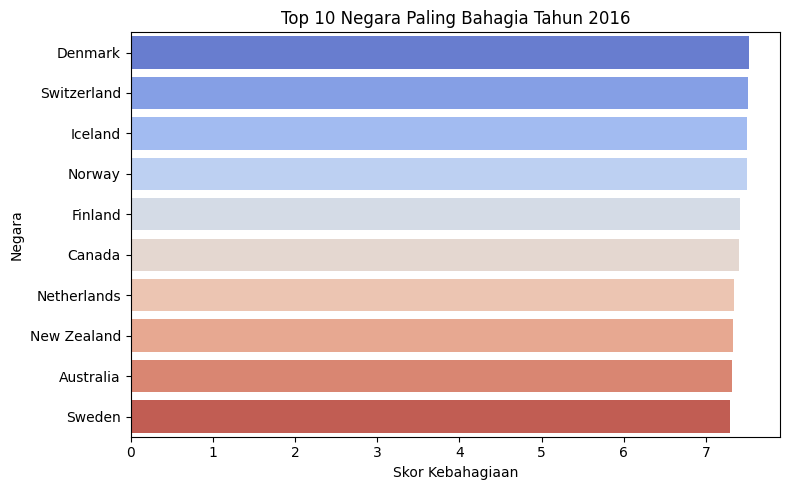

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_11884\1118647419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


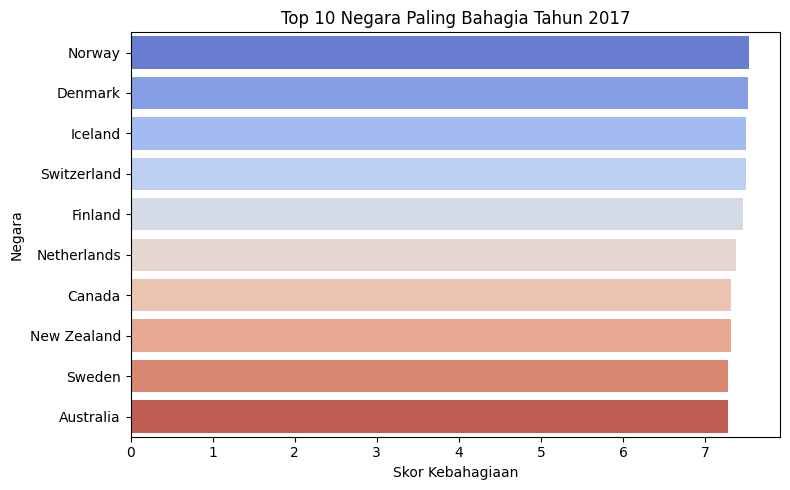

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_11884\1118647419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


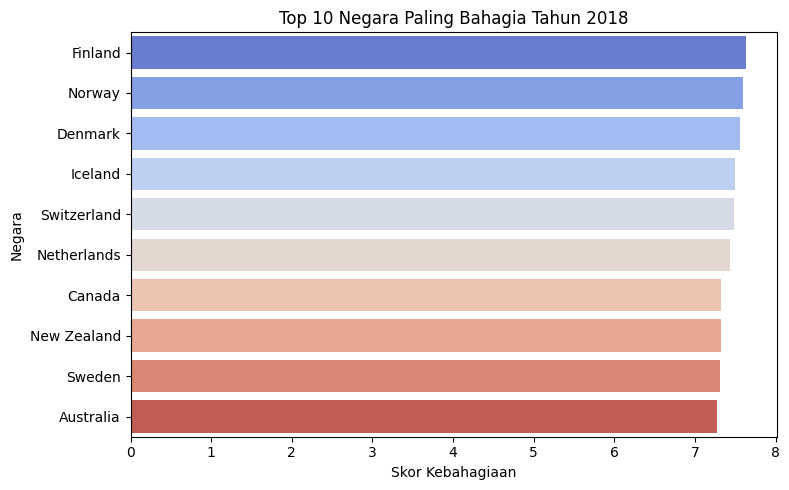

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_11884\1118647419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


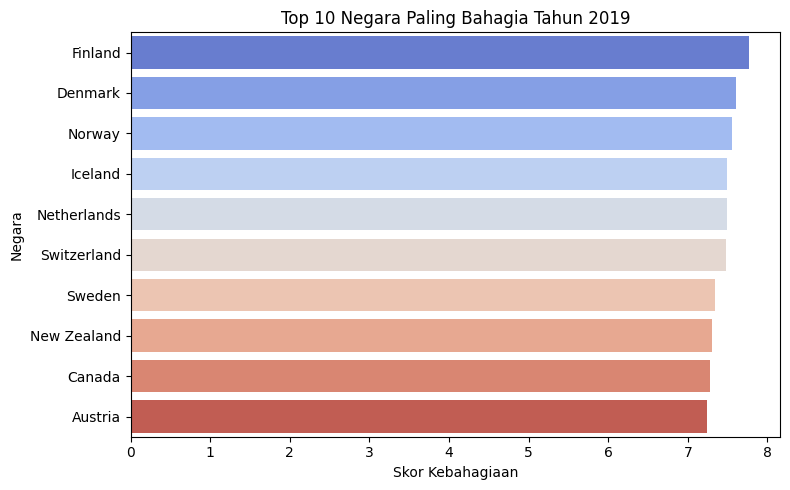

In [4]:
for year in sorted(df_all["Year"].unique()):
    top10 = df_all[df_all["Year"] == year].sort_values(by="Score", ascending=False).head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x="Score", y="Country", data=top10,
        palette="coolwarm"
    )
    plt.title(f"Top 10 Negara Paling Bahagia Tahun {year}")
    plt.xlabel("Skor Kebahagiaan")
    plt.ylabel("Negara")
    plt.tight_layout()
    plt.show()


Faktor utama (gdp, social support, corruption)

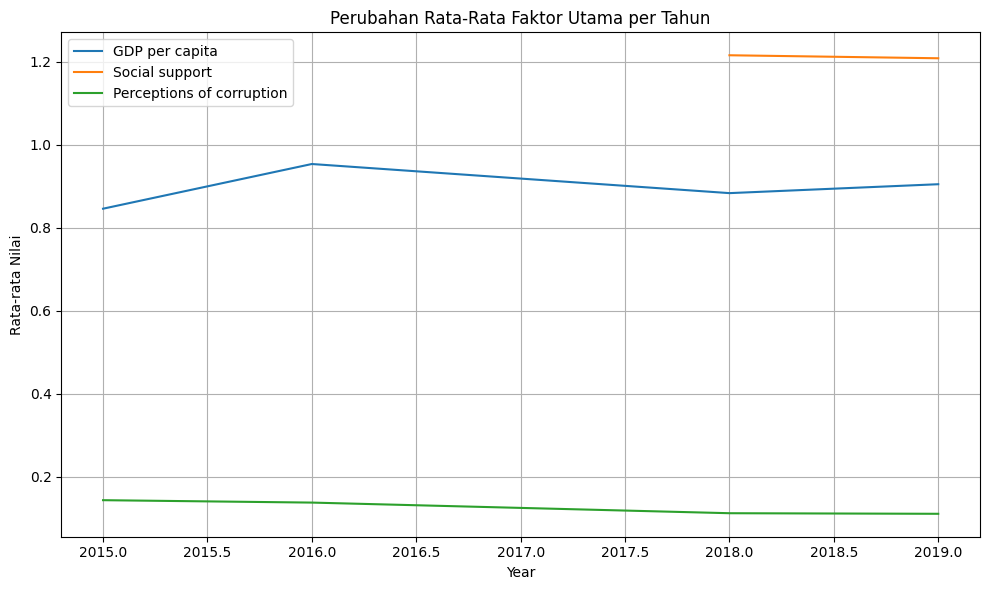

In [ ]:
avg_factors = df_all.groupby("Year")[[
    "GDP per capita",
    "Social support",
    "Perceptions of corruption"
]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_factors, x="Year", y="GDP per capita", label="GDP per capita")
sns.lineplot(data=avg_factors, x="Year", y="Social support", label="Social support")
sns.lineplot(data=avg_factors, x="Year", y="Perceptions of corruption", label="Perceptions of corruption")
plt.title("Perubahan Rata-Rata Faktor Utama per Tahun")
plt.ylabel("Rata-rata Nilai")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Korelasi

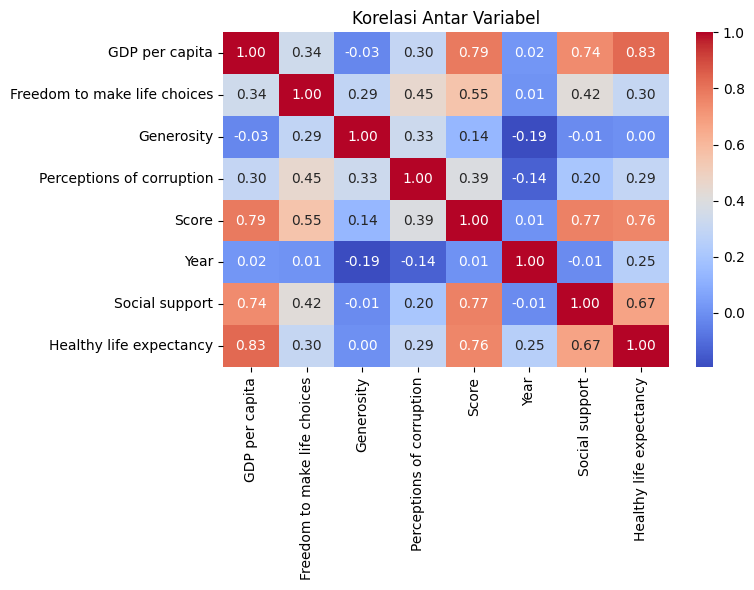

In [ ]:
plt.figure(figsize=(8, 6))
numerik_df = df_all.select_dtypes(include="number") 
sns.heatmap(numerik_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.tight_layout()
plt.show()

Factor vs 

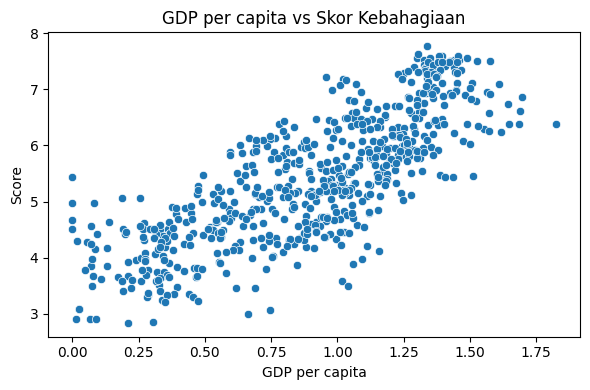

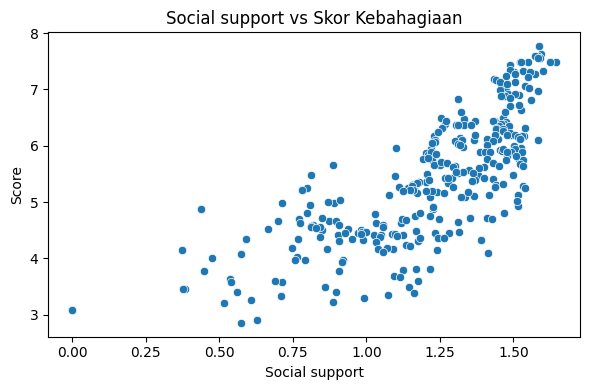

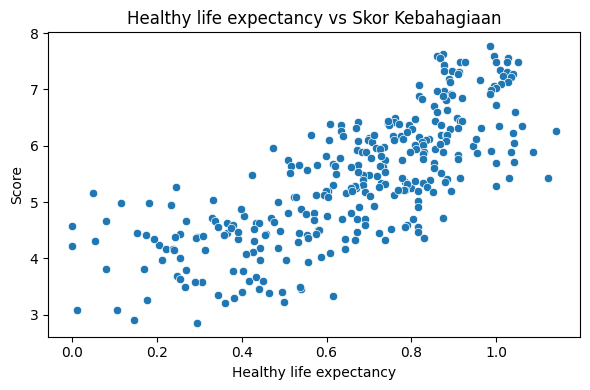

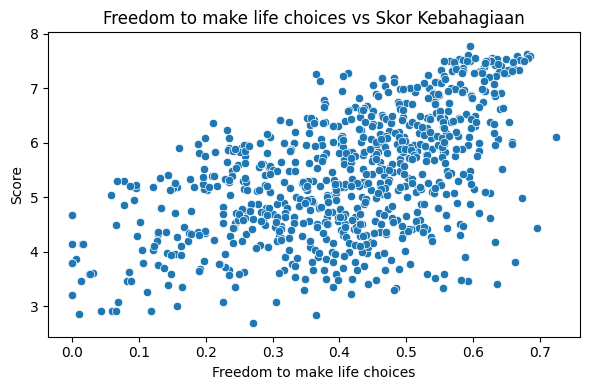

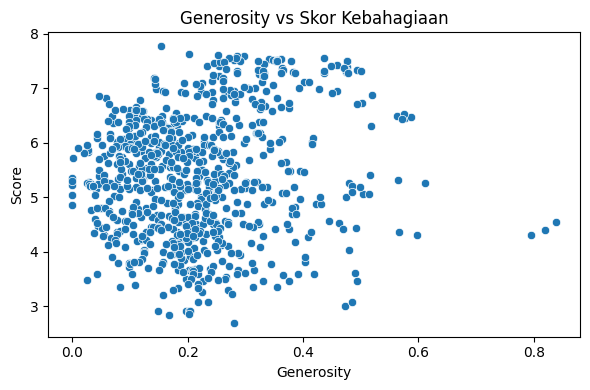

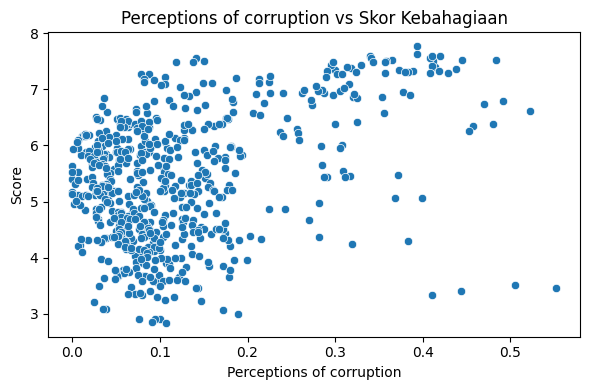

In [ ]:
features = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_all, x=col, y="Score")
    plt.title(f"{col} vs Skor Kebahagiaan")
    plt.tight_layout()
    plt.show()

Error Plot Vs Prediksi Actual

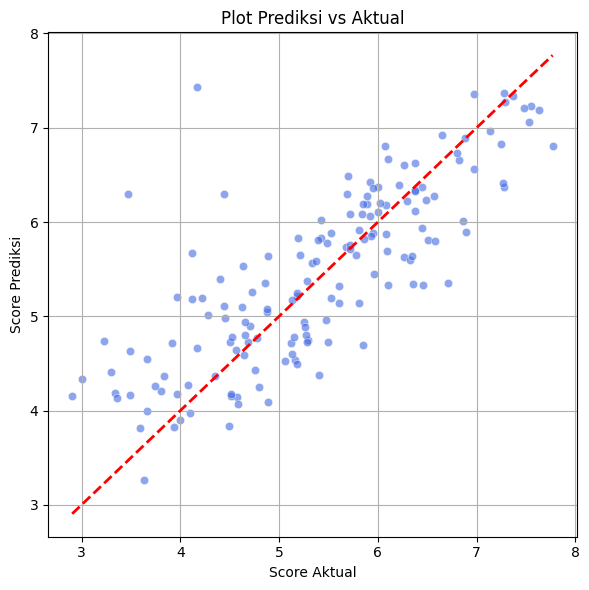

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Score Aktual")
plt.ylabel("Score Prediksi")
plt.title("Plot Prediksi vs Aktual")
plt.grid(True)
plt.tight_layout()
plt.savefig("prediksi_vs_aktual.png")
plt.show()


In [ ]:
df_all["Predicted_Score"] = rf.predict(X)
top10_prediksi = df_all.sort_values(by="Predicted_Score", ascending=False).head(10)

print("\n Top 10 Negara dengan Skor Kebahagiaan Tertinggi (Hasil Prediksi Model):")
print(top10_prediksi[["Country", "Year", "Predicted_Score"]])


 Top 10 Negara dengan Skor Kebahagiaan Tertinggi (Hasil Prediksi Model):
         Country  Year  Predicted_Score
471       Norway  2018          7.52490
0    Switzerland  2015          7.52345
472      Denmark  2018          7.50119
317      Iceland  2017          7.44813
315       Norway  2017          7.44218
443     Cambodia  2017          7.43404
316      Denmark  2017          7.42701
626      Denmark  2019          7.42352
473      Iceland  2018          7.39701
3         Norway  2015          7.39477
